In [67]:
import pandas as pd

df = pd.read_csv('test_results_by_experiment.csv')

## HTI 2005-2006, KWT 1995

In [68]:
first = df[df['Identified outliers'].str.contains('KWT 1995') & df['Identified outliers'].str.contains('HTI 2005')
                & df['Identified outliers'].str.contains('HTI 2006') & df['Independent'].str.contains('democracy') 
                & df['Dependent'].str.contains('military_spending_of_gdp')
                & df['Year Range'].str.contains('1995 - 2006')]

In [69]:
first['Country Code'].unique()

array(['BRA'], dtype=object)

In [70]:
from pyod.models.cblof import CBLOF
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import interpolate
from scipy.spatial import ConvexHull
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [71]:
first = first.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='median')

columns_with_na_first = first.columns[first.isna().any()].tolist()
for col in columns_with_na_first: #impute na values with median
    first[col] = imputer.fit_transform(first[[col]])

scaler = RobustScaler()
numeric_col_standardized_first = scaler.fit_transform(first)

pca = PCA(n_components=2)
X_reduced_cblof_first = pca.fit_transform(numeric_col_standardized_first)

In [72]:
model = CBLOF()
model.fit(numeric_col_standardized_first)
y_pred_first = model.predict(numeric_col_standardized_first)

first['Outlier_CBLOF'] = y_pred_first

tsne = TSNE(n_components=2)
X_tsne_cblof_first = tsne.fit_transform(numeric_col_standardized_first)

/Users/kei/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


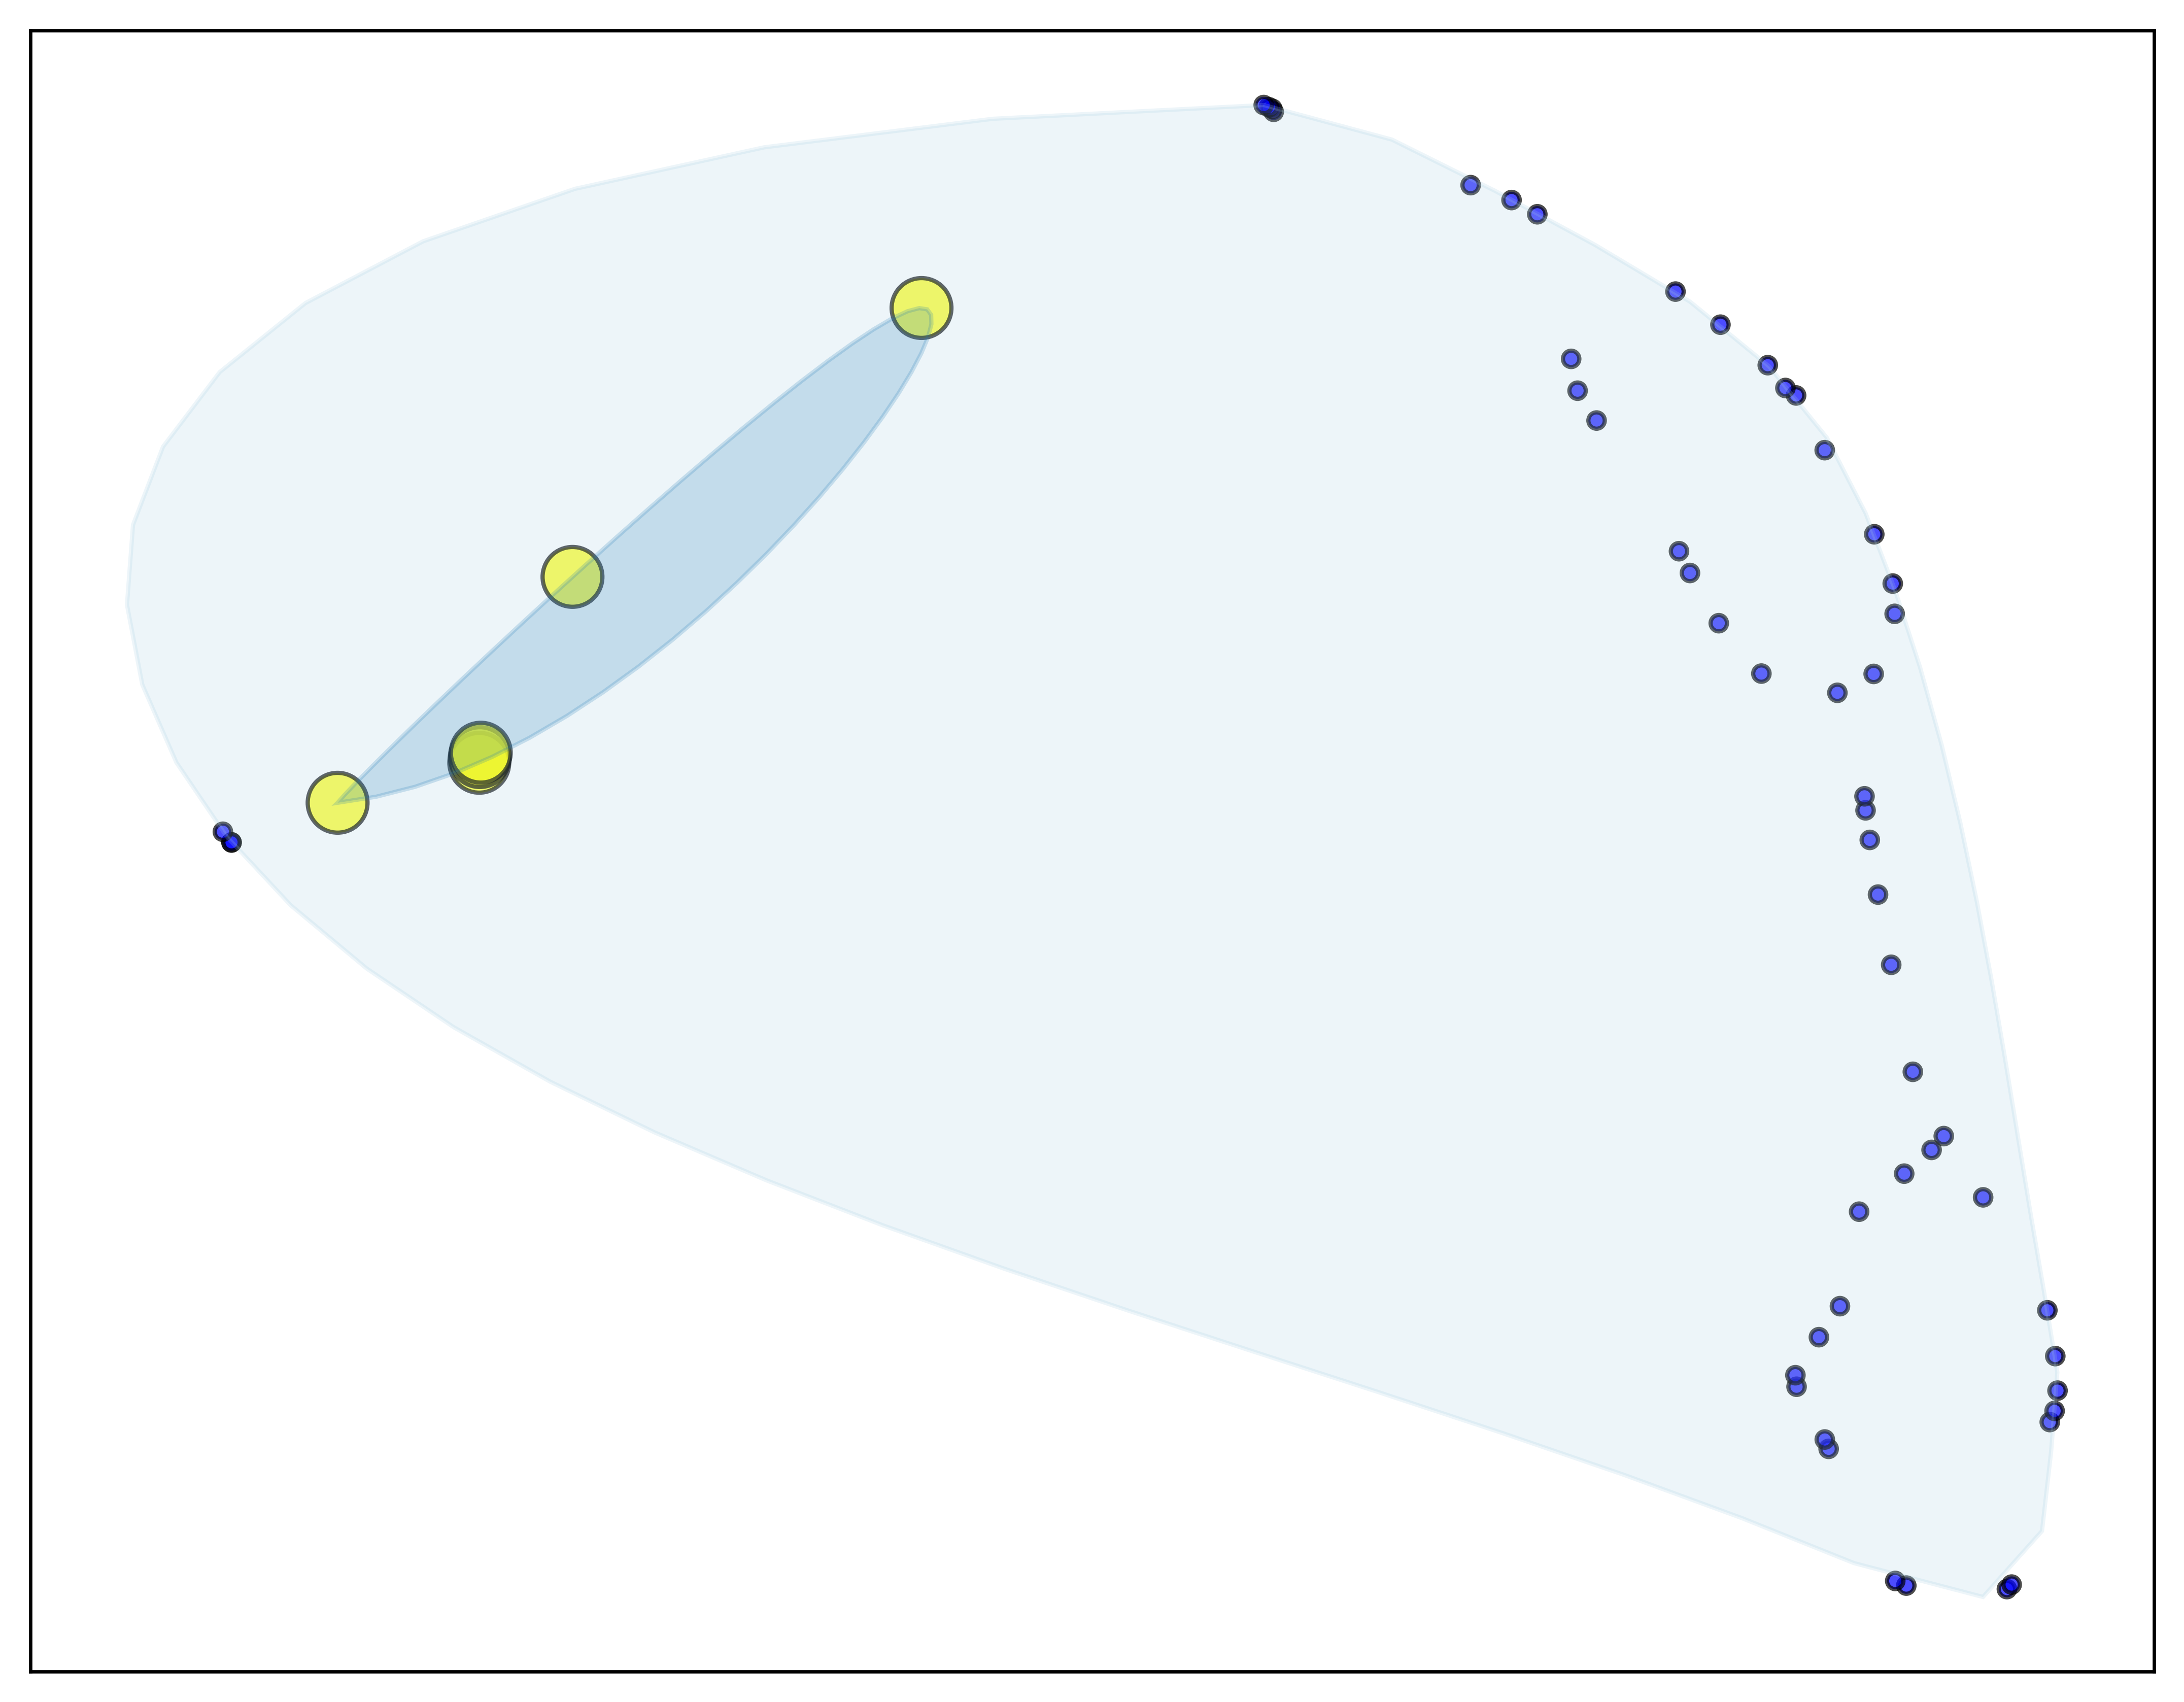

In [73]:
mpl.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (9.0, 7.0)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10

pal = sns.color_palette("Paired")[:len(set(first['Outlier_CBLOF']))]
scatter = plt.scatter(
    X_tsne_cblof_first[:, 0], 
    X_tsne_cblof_first[:, 1], 
    c=first['Outlier_CBLOF'].map({0: 'blue', 1: 'yellow'}), 
    s=first['Outlier_CBLOF'].map({0: 15, 1: 200}), 
    edgecolors='k',
    alpha=0.7,
)

plt.xticks([])
plt.yticks([])

for i in first['Outlier_CBLOF'].unique():
    points = X_tsne_cblof_first[first['Outlier_CBLOF'] == i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])

    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    
    plt.fill(interp_x, interp_y, '--', c=pal[i], alpha=0.2)

## FIN 1992, BIH 1996, IRQ 1991

In [74]:
second = df[df['Identified outliers'].str.contains('FIN 1992') & df['Identified outliers'].str.contains('BIH 1996')
                & df['Identified outliers'].str.contains('IRQ 1991')
                & df['Independent'].str.contains('democracy') & df['Dependent'].str.contains('gdp_growth')]

In [75]:
second['Country Code'].unique()

array(['SGP'], dtype=object)

In [76]:
second = second.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='median')

columns_with_na_second = second.columns[second.isna().any()].tolist()
for col in columns_with_na_second: #impute na values with median
    second[col] = imputer.fit_transform(second[[col]])

scaler = RobustScaler()
numeric_col_standardized_second = scaler.fit_transform(second)

pca = PCA(n_components=2)
X_reduced_cblof_second = pca.fit_transform(numeric_col_standardized_second)

In [77]:
model = CBLOF()
model.fit(numeric_col_standardized_second)
y_pred_second = model.predict(numeric_col_standardized_second)

second['Outlier_CBLOF'] = y_pred_second

tsne = TSNE(n_components=2)
X_tsne_cblof_second = tsne.fit_transform(numeric_col_standardized_second)

/Users/kei/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


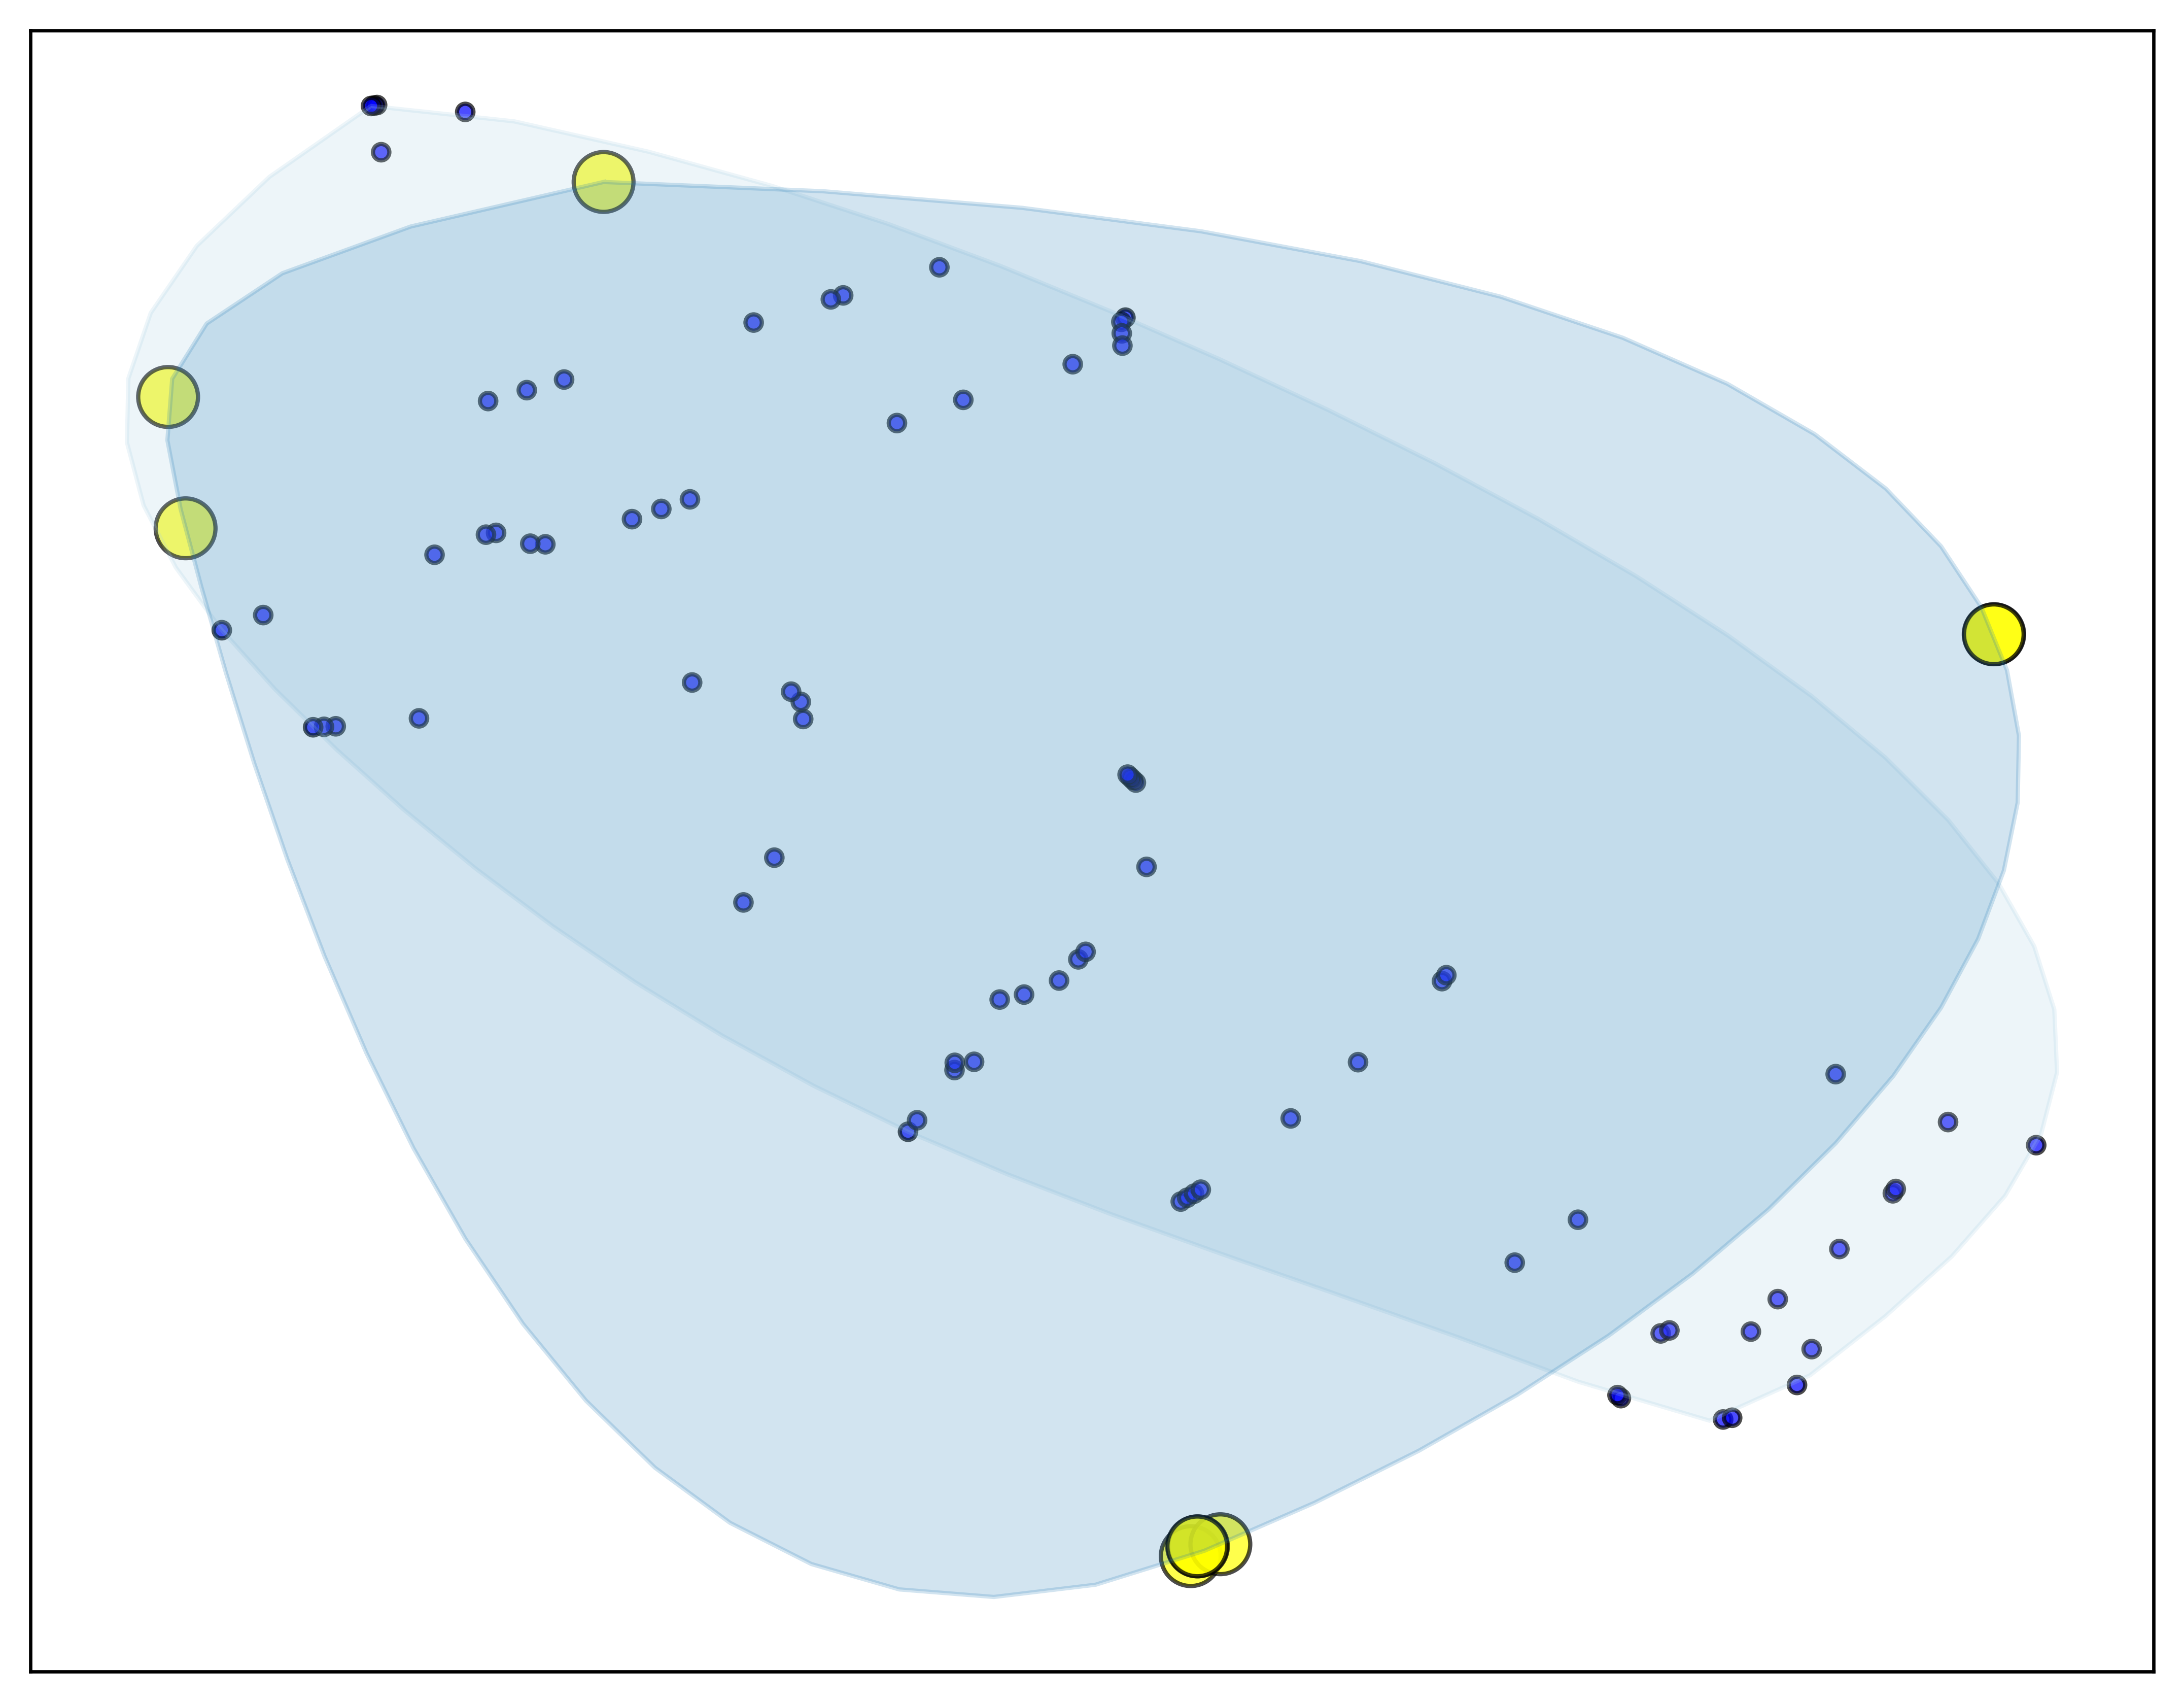

In [78]:
mpl.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (9.0, 7.0)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10

pal = sns.color_palette("Paired")[:len(set(second['Outlier_CBLOF']))]
scatter = plt.scatter(
    X_tsne_cblof_second[:, 0], 
    X_tsne_cblof_second[:, 1], 
    c=second['Outlier_CBLOF'].map({0: 'blue', 1: 'yellow'}), 
    s=second['Outlier_CBLOF'].map({0: 15, 1: 200}), 
    edgecolors='k',
    alpha=0.7,
)

plt.xticks([])
plt.yticks([])

for i in second['Outlier_CBLOF'].unique():
    points = X_tsne_cblof_second[second['Outlier_CBLOF'] == i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])

    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    
    plt.fill(interp_x, interp_y, '--', c=pal[i], alpha=0.2)

## NOR 2011-2014, CHE 2011-2016, ZWE 2001

In [79]:
third = df[df['Identified outliers'].str.contains('NOR 2011') & df['Identified outliers'].str.contains('NOR 2012')
                & df['Identified outliers'].str.contains('NOR 2013') & df['Identified outliers'].str.contains('NOR 2014')
                & df['Identified outliers'].str.contains('NOR 2015') & df['Identified outliers'].str.contains('NOR 2016')
                & df['Identified outliers'].str.contains('CHE 2011') & df['Identified outliers'].str.contains('CHE 2012')
                & df['Identified outliers'].str.contains('CHE 2013') & df['Identified outliers'].str.contains('CHE 2014')
                & df['Identified outliers'].str.contains('CHE 2015') & df['Identified outliers'].str.contains('CHE 2016')
                & df['Identified outliers'].str.contains('ZWE 2001')
                & df['Independent'].str.contains('healthcare_spending_pc') & df['Dependent'].str.contains('disability_adjusted_life_years')]

In [80]:
third['Country Code'].unique()

array(['COL'], dtype=object)

In [87]:
third = third.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='median')

columns_with_na_third = third.columns[third.isna().any()].tolist()
for col in columns_with_na_third: #impute na values with median
    third[col] = imputer.fit_transform(third[[col]])

scaler = RobustScaler() #robust scaling
numeric_col_standardized_third = scaler.fit_transform(third)


pca = PCA(n_components=2)
X_reduced_cblof_third = pca.fit_transform(numeric_col_standardized_third)

In [88]:
model = CBLOF()
model.fit(numeric_col_standardized_third)
y_pred_third = model.predict(numeric_col_standardized_third)

third['Outlier_CBLOF'] = y_pred_third

tsne = TSNE(n_components=2)
X_tsne_cblof_third = tsne.fit_transform(numeric_col_standardized_third)

/Users/kei/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


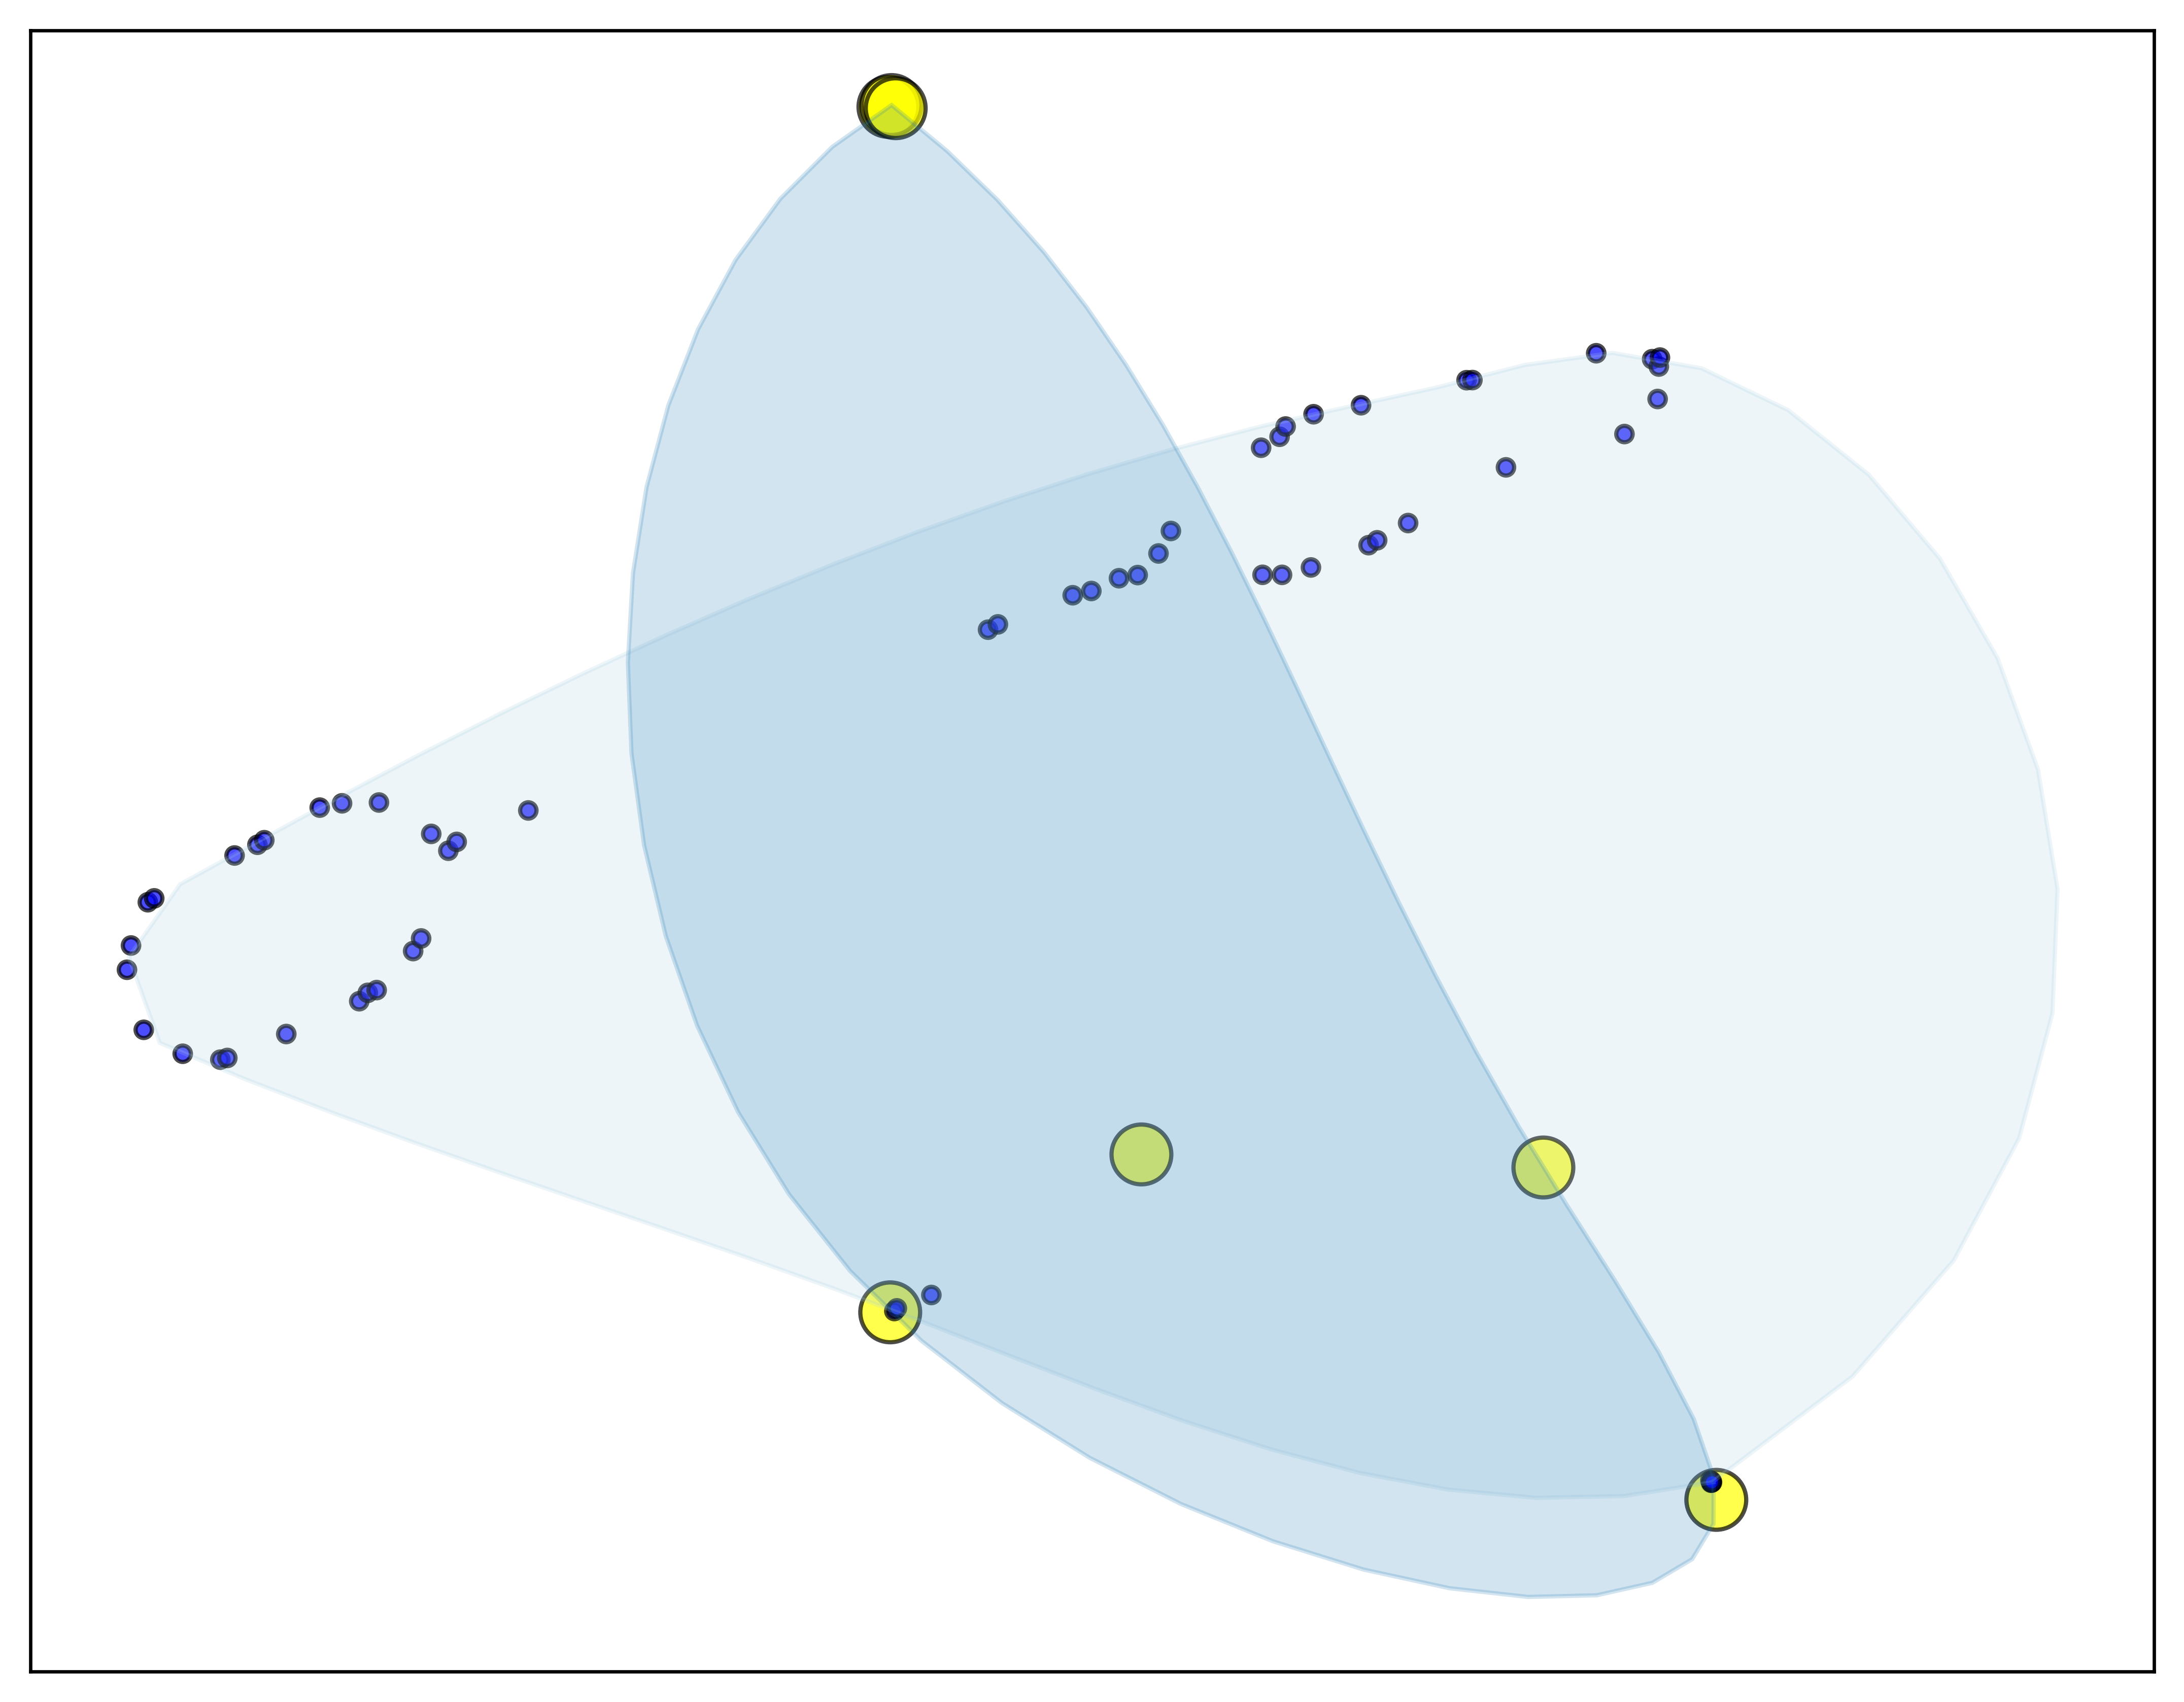

In [89]:
mpl.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (9.0, 7.0)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10

pal = sns.color_palette("Paired")[:len(set(third['Outlier_CBLOF']))]
scatter = plt.scatter(
    X_tsne_cblof_third[:, 0], 
    X_tsne_cblof_third[:, 1], 
    c=third['Outlier_CBLOF'].map({0: 'blue', 1: 'yellow'}), 
    s=third['Outlier_CBLOF'].map({0: 15, 1: 200}), 
    edgecolors='k',
    alpha=0.7,
)

plt.xticks([])
plt.yticks([])

for i in third['Outlier_CBLOF'].unique():
    points = X_tsne_cblof_third[third['Outlier_CBLOF'] == i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])

    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    
    plt.fill(interp_x, interp_y, '--', c=pal[i], alpha=0.2)